In [32]:
from collections import deque
import copy
import random

In [33]:
maze = [
    [0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 1, 0, 1, 1, 0, 1, 1, 1, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
    [1, 1, 0, 1, 0, 1, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 0, 1, 1, 0],
    [0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 1, 0, 1, 1, 1, 1, 1, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
]

start = (0, 0)
end = (9, 9)

dirs = [(-1,0), (1,0), (0,-1), (0,1)] 

def print_path(maze, path):
    maze_copy = [['#' if cell == 1 else ' ' for cell in row] for row in maze]
    for x, y in path:
        maze_copy[x][y] = '*'
    for row in maze_copy:
        print(" ".join(row))
    print(maze)

In [34]:
def print_original_maze(maze):
    print("Original Maze:")
    for row in maze:
        print(" ".join(str(cell) for cell in row))
    print()
print_original_maze(maze)
print("Legend: 0 = path, 1 = wall")

Original Maze:
0 1 0 0 0 0 1 0 0 0
0 1 0 1 1 0 1 1 1 0
0 0 0 1 0 0 0 0 1 0
1 1 0 1 0 1 1 0 1 0
0 0 0 0 0 1 0 0 0 0
0 1 1 1 1 1 0 1 1 0
0 1 0 0 0 0 0 1 0 0
0 1 0 1 1 1 1 1 0 1
0 0 0 0 0 0 0 0 0 0
1 1 1 1 1 1 1 1 1 0

Legend: 0 = path, 1 = wall


In [35]:
def bfs(maze, start, end):
    queue = deque([(start, [start])])
    visited = set()
    while queue:
        (x, y), path = queue.popleft()
        if (x, y) == end:
            print("BFS :")
            print_path(maze, path)
            return path
        if (x, y) in visited:
            continue
        visited.add((x, y))
        for dx, dy in dirs:
            nx, ny = x + dx, y + dy
            if 0 <= nx < 10 and 0 <= ny < 10 and maze[nx][ny] == 0 and (nx, ny) not in visited:
                queue.append(((nx, ny), path + [(nx, ny)]))
    print("BFS: No path found")
    return []
bfs_path = bfs(copy.deepcopy(maze), start, end)

BFS :
* #         #      
* #   # #   # # #  
* * * #         #  
# # * #   # #   #  
* * *     #        
* # # # # #   # #  
* #           #    
* #   # # # # #   #
* * * * * * * * * *
# # # # # # # # # *
[[0, 1, 0, 0, 0, 0, 1, 0, 0, 0], [0, 1, 0, 1, 1, 0, 1, 1, 1, 0], [0, 0, 0, 1, 0, 0, 0, 0, 1, 0], [1, 1, 0, 1, 0, 1, 1, 0, 1, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 1, 1, 1, 1, 1, 0, 1, 1, 0], [0, 1, 0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 0, 1, 1, 1, 1, 1, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 0]]


In [36]:
def dfs(maze, start, end):
    stack = [(start, [start])]
    visited = set()
    while stack:
        (x, y), path = stack.pop()
        if (x, y) == end:
            print("DFS:")
            print_path(maze, path)
            return path
        if (x, y) in visited:
            continue
        visited.add((x, y))
        for dx, dy in dirs:
            nx, ny = x + dx, y + dy
            if 0 <= nx < 10 and 0 <= ny < 10 and maze[nx][ny] == 0 and (nx, ny) not in visited:
                stack.append(((nx, ny), path + [(nx, ny)]))
    print("DFS: No path found")
    return []
dfs_path = dfs(copy.deepcopy(maze), start, end)

DFS:
* #         #      
* #   # #   # # #  
* * * # * * * * #  
# # * # * # # * #  
    * * * #   * * *
  # # # # #   # # *
  #           # * *
  #   # # # # # * #
                * *
# # # # # # # # # *
[[0, 1, 0, 0, 0, 0, 1, 0, 0, 0], [0, 1, 0, 1, 1, 0, 1, 1, 1, 0], [0, 0, 0, 1, 0, 0, 0, 0, 1, 0], [1, 1, 0, 1, 0, 1, 1, 0, 1, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 1, 1, 1, 1, 1, 0, 1, 1, 0], [0, 1, 0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 0, 1, 1, 1, 1, 1, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 0]]


In [37]:
def run_flood_fill(maze, start, end):
    visited = set()
    path = []
    if flood_fill(maze, start[0], start[1], visited, end, path):
        print("Flood Fill:")
        print_path(maze, path)
        return path
    else:
        print(" Flood Fill:")
        return []
flood_path = run_flood_fill(copy.deepcopy(maze), start, end)

Flood Fill:
* # * * * * #      
* # * # # * # # #  
* * * # * *     #  
# #   # * # #   #  
* * * * * # * * * *
* # # # # # * # # *
* # * * * * * # * *
* # * # # # # # * #
* * *           * *
# # # # # # # # # *
[[0, 1, 0, 0, 0, 0, 1, 0, 0, 0], [0, 1, 0, 1, 1, 0, 1, 1, 1, 0], [0, 0, 0, 1, 0, 0, 0, 0, 1, 0], [1, 1, 0, 1, 0, 1, 1, 0, 1, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 1, 1, 1, 1, 1, 0, 1, 1, 0], [0, 1, 0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 0, 1, 1, 1, 1, 1, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 0]]


In [38]:
print(f"BFS Path Length     : {len(bfs_path)}")
print(f"DFS Path Length     : {len(dfs_path)} ")
print(f"Flood Fill Length   : {len(flood_path)}")

BFS Path Length     : 23
DFS Path Length     : 25 
Flood Fill Length   : 43


In [42]:
import matplotlib.pyplot as plt
import numpy as np

def plot_maze(maze, path=None, start=None, end=None, title="Maze"):
    maze_array = np.array(maze)
    cmap = plt.cm.get_cmap('Greys')
    plt.figure(figsize=(6, 6))
    plt.imshow(maze_array, cmap=cmap, origin='upper')

    if path:
        px, py = zip(*path)
        plt.plot(py, px, color='red', linewidth=2, label='Path')

    if start:
        plt.scatter(start[1], start[0], c='green', s=100, label='Start', marker='o')
    if end:
        plt.scatter(end[1], end[0], c='blue', s=100, label='End', marker='X')

    plt.title(title)
    plt.xticks([]), plt.yticks([])
    plt.legend(loc='upper right')
    plt.grid(False)
    plt.show()


<ipython-input-42-4a8b63ab9707>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Greys')


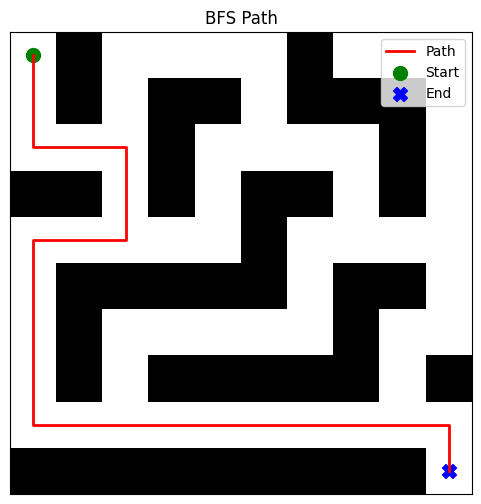

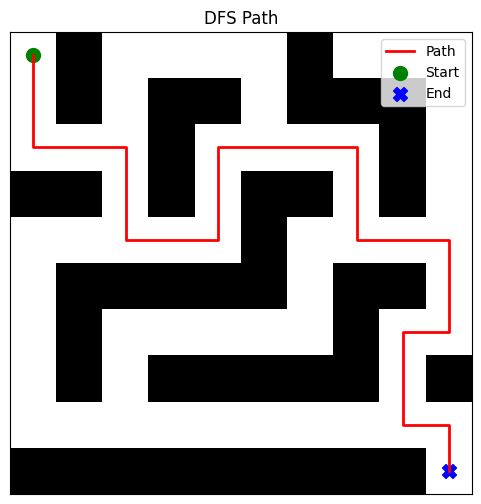

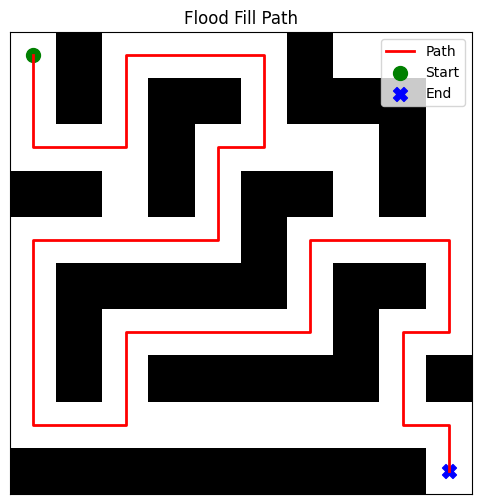

In [43]:
plot_maze(maze, bfs_path, start, end, title="BFS Path")
plot_maze(maze, dfs_path, start, end, title="DFS Path")
plot_maze(maze, flood_path, start, end, title="Flood Fill Path")
